In [1]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def cost(treatment):
    return random.random()

def benefit(treatment):
    return random.random()

def score(schedule):
    cost_sum = sum(cost(treatment) for treatment in schedule)
    benefit_sum = sum(benefit(treatment) for treatment in schedule)
    return cost_sum, benefit_sum

def score_total(cost, benefit):
    return benefit - cost

In [46]:
# Start the stopwatch
start_time = time.time()

all_treatments = [(dose, period) for dose in [0,1,2] for period in [0,1,2]]

all_schedules = [(t1, t2, t3, t4) for t1 in all_treatments for t2 in all_treatments for t3 in all_treatments for t4 in all_treatments]

scored_schedules = [(*schedule, *score(schedule)) for schedule in all_schedules]

df_sch = pd.DataFrame(scored_schedules, columns = ["t1", "t2", "t3", "t4", "cost", "benefit"])
df_sch.head()

# add total score column
df_sch["total_score"] = df_sch.apply(lambda x: score_total(x["cost"], x["benefit"]), axis=1)

# find best schedule as the maximum total score
best_schedule = df_sch.loc[df_sch["total_score"].idxmax()]

# Stop the stopwatch
end_time = time.time()

elapsed_time = end_time - start_time

print(f"Tested {len(df_sch)} treatment schedules.")
print(f"Elapsed Time: {elapsed_time:.4f} seconds")
print(f"Best schedule:\n{best_schedule.iloc[0:4]}\nCost: {best_schedule['cost']:.4f}\nBenefit: {best_schedule['benefit']:.4f}")

Tested 6561 treatment schedules.
Elapsed Time: 0.1469 seconds
Best schedule:
t1    (1, 1)
t2    (1, 0)
t3    (0, 1)
t4    (1, 1)
Name: 3172, dtype: object
Cost: 0.2843
Benefit: 3.0754


In [48]:
df_sch.head()

,t1,t2,t3,t4,cost,benefit,total_score
0,"(0, 0)","(0, 0)","(0, 0)","(0, 0)",1.937142,1.063323,-0.873818
1,"(0, 0)","(0, 0)","(0, 0)","(0, 1)",1.690276,2.454066,0.763790
2,"(0, 0)","(0, 0)","(0, 0)","(0, 2)",3.141380,2.686087,-0.455292
3,"(0, 0)","(0, 0)","(0, 0)","(1, 0)",1.840822,2.313000,0.472178
4,"(0, 0)","(0, 0)","(0, 0)","(1, 1)",1.523266,2.209913,0.686646


Text(0.5, 1.0, 'Cost vs Benefit for All Treatment Schedules')

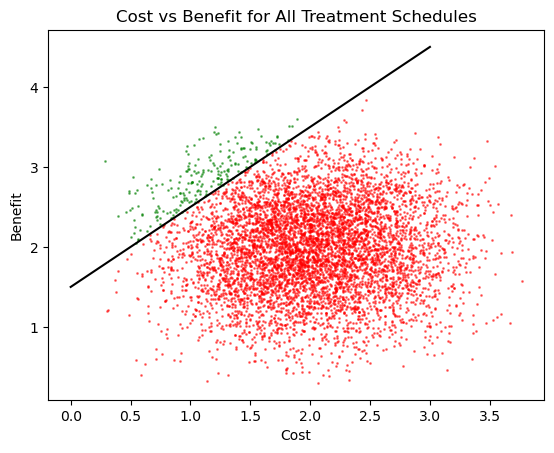

In [54]:
threshold = 1.5
above_threshold = df_sch.loc[df_sch["total_score"] > threshold]
below_threshold = df_sch.loc[df_sch["total_score"] <= threshold]
plt.scatter(above_threshold["cost"], above_threshold["benefit"], s=1, alpha=0.5, c="green")
plt.scatter(below_threshold["cost"], below_threshold["benefit"], s=1, alpha=0.5, c="red")

# add a line at y = x - 1.5
x = np.linspace(0, 3, 100)
y = x + threshold
plt.plot(x, y, c="black")

plt.xlabel("Cost")
plt.ylabel("Benefit")
plt.title("Cost vs Benefit for All Treatment Schedules")